In [110]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams.keys()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [111]:
features_to_exclude= [
    "signal_power",
    "temp_zscore",
    "duration_log_z",
    "energy_rank_pct",
    "tempo_vs_genre",
    "intensity_level",
    "happy_dance"
    "is_dance_hit"
    "echo_constant"
]

#r2_scores sorted
features_r2_scores = ['artists_avg_popularity',
 'album_freq',
 'target_class_class_65',
 'purity_score',
 'signal_strength',
 'signal_power',
 'energy_rank_pct',
 'loudness_yeo',
 'intensity_level',
 'duration_4',
 'duration_log',
 'duration_log_z',
 'popularity_level',
 'target_class_class_73',
 'loud_energy_ratio',
 'mood_pca',
 'loudness_level',
 'duration_2',
 'mode_indicator',
 'loudness_intensity',
 'artist_song_count',
 'explicit',
 'temp_zscore',
 'activity_rate',
 'happy_dance',
 'positivity_index',
 'tempo_class',
 'duration_3',
 'duration_1',
 'acoustic_valence_mood_cluster',
 'duration_5',
 'time_signature_class_boolean',
 'key_mode',
 'time_signature',
 'acoustics_instrumental',
 'timbre_index',
 'resonance_factor',
 'movement_index',
 'mood_cluster',
 'ambient_level',
 'key_sin',
 'key_cos',
 'verbal_density',
 'tempo_vs_genre',
 'focus_factor',
 'distorted_movement',
 'is_instrumental',
 'is_dance_hit',
 'echo_constant']


df = pd.read_csv('../../datasets/group_14.csv')
df["focus_factor"] = (
    df["focus_factor"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)
df["focus_factor"] = pd.to_numeric(df["focus_factor"], errors="coerce")

In [112]:
# Encode categorical variable
df_encoded = pd.get_dummies(data=df, columns=["target_class"], drop_first=True)

# Define target and features
y = df_encoded['target_regression']
X = df_encoded.drop(columns=["target_regression"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

In [113]:
X_train_p = X_train.astype(float)
X_train_sm = sm.add_constant(X_train_p)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      target_regression   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:32:10   Log-Likelihood:                -2366.3
No. Observations:                2400   AIC:                             4817.
Df Residuals:                    2358   BIC:                             5060.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
duration_1    

In [116]:

features_to_verify = [f for f in features_r2_scores if f not in features_to_exclude]

selected_cols = features_to_verify[:2]  # start with first 2 features
X_current = X_train[selected_cols].copy()

lr = LinearRegression()
lr.fit(X_current, y_train)
y_pred = lr.predict(X_current)
prev_r2 = r2_score(y_train, y_pred)

print(f"Starting with {selected_cols}, initial R²: {prev_r2:.5f}\n")

threshold = 0.001  # Minimum improvement required

# Add remaining features one by one
for col in features_to_verify[2:]:
    X_temp = pd.concat([X_current, X_train[[col]]], axis=1)
    lr.fit(X_temp, y_train)
    y_pred = lr.predict(X_temp)
    new_r2 = r2_score(y_train, y_pred)

    delta = new_r2 - prev_r2

    if delta >= threshold:  # add only if improvement >= threshold
        X_current = X_temp
        prev_r2 = new_r2
        selected_cols.append(col)
        print(f"Added '{col}' → R² improved by {delta:+.5f} → {new_r2:.5f}")
    elif delta < 0:  # stop if R² gets worse
        print(f"Stopped: adding '{col}' decreased R² by {delta:+.5f} → {new_r2:.5f}")
        break
    else:  # ignore if improvement < threshold but not negative
        print(f"Ignored '{col}' → R² change {delta:+.5f} (below threshold)")

print("\nSelected features:")
print(selected_cols)
print(f"\nFinal R²: {prev_r2:.5f}")

Starting with ['artists_avg_popularity', 'album_freq'], initial R²: 0.73557

Added 'target_class_class_65' → R² improved by +0.00466 → 0.74023
Ignored 'purity_score' → R² change +0.00000 (below threshold)
Ignored 'signal_strength' → R² change +0.00004 (below threshold)
Ignored 'loudness_yeo' → R² change +0.00006 (below threshold)
Ignored 'duration_4' → R² change +0.00005 (below threshold)
Ignored 'duration_log' → R² change +0.00002 (below threshold)
Ignored 'popularity_level' → R² change +0.00008 (below threshold)
Added 'target_class_class_73' → R² improved by +0.00292 → 0.74315
Ignored 'loud_energy_ratio' → R² change +0.00012 (below threshold)
Ignored 'mood_pca' → R² change +0.00008 (below threshold)
Ignored 'loudness_level' → R² change +0.00001 (below threshold)
Ignored 'duration_2' → R² change +0.00003 (below threshold)
Ignored 'mode_indicator' → R² change +0.00069 (below threshold)
Ignored 'loudness_intensity' → R² change +0.00000 (below threshold)
Added 'artist_song_count' → R² im

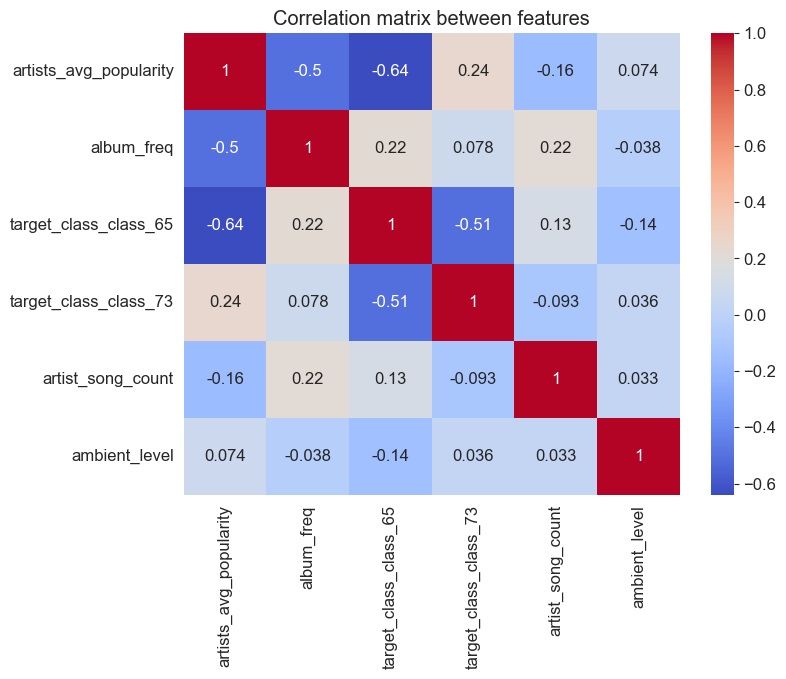

In [100]:
corr_matrix = X_current.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix between features")
plt.show()

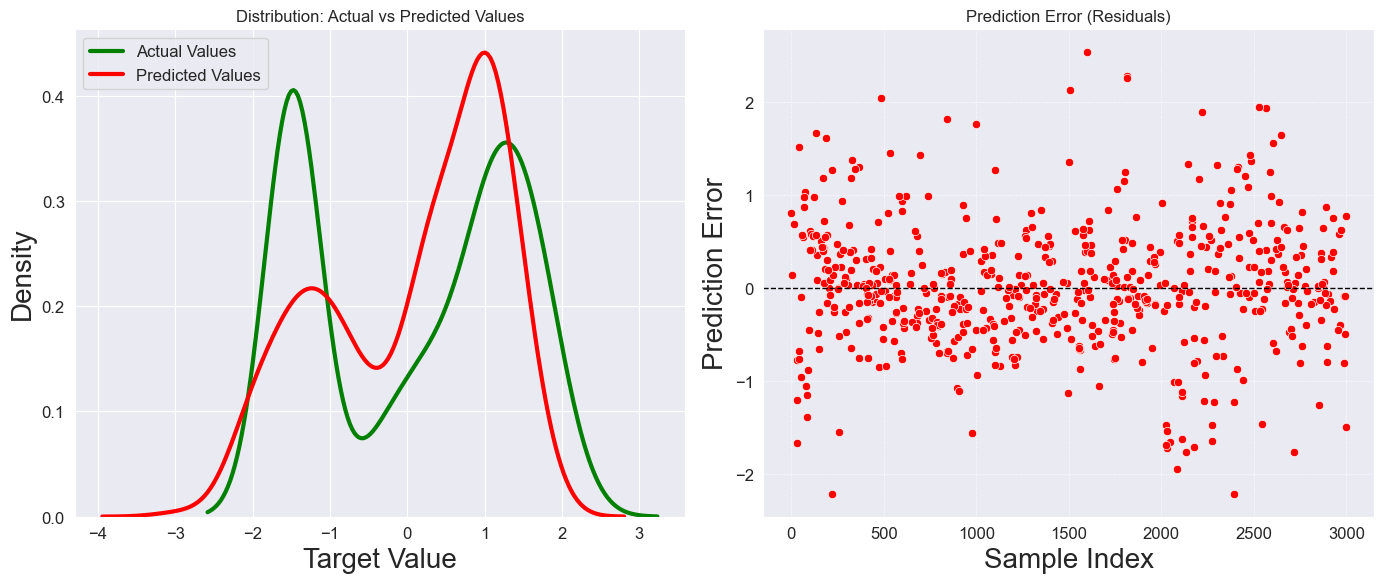

MAE (Test): 0.49595319489083994
R² (Test): 0.7331572950934317


In [101]:
#Perform a test run on an unused random seed
# to evaluate the model's overall performance on unseen data.

X_train, X_test, y_train, y_test = train_test_split(
        X[X_current.columns], y, test_size=0.2, random_state=42
    )
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

predictions = lr_model.predict(X_test)
# Create DataFrame for plotting
df_plot = pd.DataFrame({
    'pr_result': predictions,
    'pr_error': y_test - predictions
})

# Create figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (1) Distribution plot: Actual vs Predicted ---
sns.kdeplot(y_test, color="g", label="Actual Values", ax=axes[0])
sns.kdeplot(df_plot['pr_result'], color="r", label="Predicted Values", ax=axes[0])
axes[0].set_title("Distribution: Actual vs Predicted Values", fontsize=12)
axes[0].legend()
axes[0].set_xlabel("Target Value")
axes[0].set_ylabel("Density")

# --- (2) Prediction error (residuals) scatter plot ---
sns.scatterplot(x=df_plot.index, y='pr_error', data=df_plot, color="r", ax=axes[1])
axes[1].set_title("Prediction Error (Residuals)", fontsize=12)
axes[1].set_ylabel("Prediction Error")
axes[1].set_xlabel("Sample Index")
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)  # reference line at 0
axes[1].grid(True, linestyle=':', linewidth=0.7)

plt.tight_layout()
plt.show()


print("MAE (Test):", mean_absolute_error(y_test, predictions))
print("R² (Test):", r2_score(y_test, predictions))